In [1]:
import os
import joblib
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from os import sys

# Set working directory
os.chdir('T:\crop-yield-estimate') ##Set this to your own path
sys.path.insert(0, 'T:\crop-yield-estimate\pipeline') ##Set this to your own path
# Import preprocessing libraries

from preprocessing import cleaning
from preprocessing import feature_engineering
from preprocessing import scaling
from preprocessing import feature_selection
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.decomposition import PCA
from collections import Counter




# Base Data Viewing 

In [2]:
base_train = pd.read_csv('data/Train.csv')

In [3]:
num_rows, num_cols = base_train.shape
print(f'There are {num_rows} rows and {num_cols} columns in the base train dataset.')

There are 3870 rows and 44 columns in the base train dataset.


# Doing Same Idea Juliette Did

In [4]:
cols = [
    "ID",
    "CropTillageDepth",
    "CropEstMethod",
    "SeedlingsPerPit",
    "TransplantingIrrigationHours",
    "TransplantingIrrigationSource",
    "LandPrepMethod_TractorPlough",
    "LandPrepMethod_FourWheelTracRotavator",
    "LandPrepMethod_WetTillagePuddling",
    "LandPrepMethod_BullockPlough",
    "LandPrepMethod_Other",
    "CropbasalFerts_Urea",
    "CropbasalFerts_DAP",
    "CropbasalFerts_Other",
    "CropbasalFerts_NPK",
    "CropbasalFerts_MoP",
    "CropbasalFerts_NPKS",
    "CropbasalFerts_SSP",
    "CropbasalFerts_None",
    "FirstTopDressFert_Urea",
    "FirstTopDressFert_DAP",
    "FirstTopDressFert_NPK",
    "FirstTopDressFert_NPKS",
    "FirstTopDressFert_SSP",
    "FirstTopDressFert_Other",
    "OrgFertilizers_Ganaura",
    "OrgFertilizers_FYM",
    "OrgFertilizers_VermiCompost",
    "OrgFertilizers_Pranamrit",
    "OrgFertilizers_Ghanajeevamrit",
    "OrgFertilizers_Jeevamrit",
    "OrgFertilizers_PoultryManure",
    "Ganaura_per_Acre",
    "CropOrgFYM_per_Acre",
    "PCropSolidOrgFertAppMethod",
    "NoFertilizerAppln",
    "MineralFertAppMethod",
    "MineralFertAppMethod.1",
    "Harv_method",
    "Threshing_method",
    #"Yield_per_Acre"
    # Date Columns
]


# Preprocessed Data Clustering

In [5]:
# Preprocess data
train_path = 'data/Train.csv'
test_path = 'data/Test.csv'
df = cleaning.clean_data(train_path, test_path)
df = feature_engineering.get_features(df)
df = scaling.scale_features(df)
df = feature_selection.select_features(df)


In [6]:
# Split data into training and test sets
df_train = df[df['Yield'].isna() == False]
df_test = df[df['Yield'].isna() == True]
# Then run clustering, please use the columns I have here (they are already scaled and one-hot encoded!)



In [7]:
df_train_rows, df_train_cols = df_train.shape
print(f'There are {df_train_rows} rows and {df_train_cols} columns in the training dataset.')

There are 3870 rows and 163 columns in the training dataset.


In [8]:
import pandas as pd

# Set the display options to show all rows
pd.set_option('display.max_rows', None)




In [9]:
nan_columns = df_train.columns[df_train.isna().any()].tolist()


In [11]:
imputed_columns = [col for col in df_train.columns if 'Imputed' in col]
print(imputed_columns)


['TpIrrigationHours_Imputed', 'SeedlingsPerPit_Imputed', '2appDaysUrea_Imputed', 'TpIrrigationHours_Imputed_per_Acre', '2appDaysUrea_Imputed_MeanDiff', 'TpIrrigationSource_Imputed_Boring', 'TpIrrigationSource_Imputed_Canal', 'TpIrrigationSource_Imputed_Pond', 'TpIrrigationSource_Imputed_Rainfed', 'TpIrrigationPowerSource_Imputed_Diesel', 'TpIrrigationPowerSource_Imputed_Electric']


In [12]:
print(nan_columns)

['SeedlingsPerPit', 'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater', '1appDaysUrea', '2appDaysUrea', 'TransplantingIrrigationHours_per_Acre', 'TransIrriCost_per_Acre', 'Days_bw_Nurs_SowTransp', 'Days_bw_Nurs_Harv', 'Days_bw_Nurs_Till', 'NursingDate_ModeDiff', 'Days_bw_Nurs_SowTransp_ModeDiff', 'Days_bw_Nurs_Harv_ModeDiff', 'Days_bw_Nurs_Till_ModeDiff', '2appDaysUrea_MeanDiff']


#### !!!!!! I dropped the NaNs **rows** in the training set

In [13]:
df_train = df_train.drop(nan_columns, axis=1)


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3870 entries, 0 to 3869
Columns: 147 entries, CultLand to Acre_Scaled
dtypes: bool(92), float64(55)
memory usage: 2.0 MB


In [15]:
df_train.columns    

Index(['CultLand', 'CropCultLand', 'CropTillageDepth', 'Ganaura', 'CropOrgFYM',
       'NoFertilizerAppln', 'BasalDAP', 'BasalUrea', '1tdUrea', '2tdUrea',
       ...
       'PCropSolidOrgFertAppMethod_Broadcasting',
       'PCropSolidOrgFertAppMethod_RootApplication',
       'PCropSolidOrgFertAppMethod_SoilApplied',
       'MineralFertAppMethod_1_Broadcasting',
       'MineralFertAppMethod_1_SoilApplied', 'MineralFertAppMethod_1_Spray',
       'MineralFertAppMethod_2_Broadcasting',
       'MineralFertAppMethod_2_RootApplication',
       'MineralFertAppMethod_2_SoilApplied', 'Acre_Scaled'],
      dtype='object', length=147)

In [16]:
df_train.head()

,CultLand,CropCultLand,CropTillageDepth,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,2tdUrea,...,PCropSolidOrgFertAppMethod_Broadcasting,PCropSolidOrgFertAppMethod_RootApplication,PCropSolidOrgFertAppMethod_SoilApplied,MineralFertAppMethod_1_Broadcasting,MineralFertAppMethod_1_SoilApplied,MineralFertAppMethod_1_Spray,MineralFertAppMethod_2_Broadcasting,MineralFertAppMethod_2_RootApplication,MineralFertAppMethod_2_SoilApplied,Acre_Scaled
0,0.560165,0.560362,0.571429,-0.146433,-0.101615,0.333333,-1.106005,1.269875,0.546620,-0.477626,...,False,False,False,True,False,False,True,False,False,0.085933
1,-0.092617,0.039792,0.571429,-0.146433,-0.101615,0.333333,0.569072,0.258647,1.089515,-0.477626,...,False,False,False,True,False,False,True,False,False,0.085933
2,-0.642329,-0.555145,0.714286,-0.133224,-0.096429,0.333333,-0.659318,-0.752581,-0.539171,-0.477626,...,False,False,True,False,True,False,False,True,False,-0.702911
3,-0.470544,-0.369227,0.714286,-0.133224,-0.101615,0.333333,-0.435974,-0.449213,-0.539171,-0.477626,...,False,False,True,True,False,False,True,False,False,-0.347375
4,1.075520,1.304034,0.428571,-0.146433,-0.101615,0.333333,0.569072,2.281103,2.175306,-0.477626,...,False,False,False,True,False,False,True,False,False,0.835890


In [17]:
num_rows, num_columns = df_train.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 3870
Number of columns: 147


In [ ]:
# This code should record how long it takes for each subsample to run



subsample_percentages = np.arange(0.3, 1.0, 0.1)
times = []

for percentage in subsample_percentages:
    subsample = df_train.sample(frac=percentage, random_state=0)
    start_time = time.time()
    for k in range(2, 6):
        spectral = SpectralClustering(n_clusters=k, assign_labels='discretize', random_state=0, n_init=10).fit(subsample)
        joblib.dump(spectral, f'spectral_clustering_model_k_{k}_subsample_{percentage}.pkl')
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

with open('subsample_times.txt', 'w') as file:
    for percentage, elapsed_time in zip(subsample_percentages, times):
        file.write(f'Subsample Percentage: {percentage * 100}% - Elapsed Time: {elapsed_time} seconds\n')

In [ ]:
subsample = df_train.sample(frac=0.2, random_state=0)

# Does SpectraL Clustering work faster ? Or is it an issue of dimensionality as opposed to samples?
for k in range(2, 6):    
    spectral = SpectralClustering(n_clusters=k, assign_labels='discretize', random_state=0, n_init=10).fit(df_train)
    joblib.dump(spectral, 
            'spectral_clustering_model_k=' + str(k) + '.pkl')


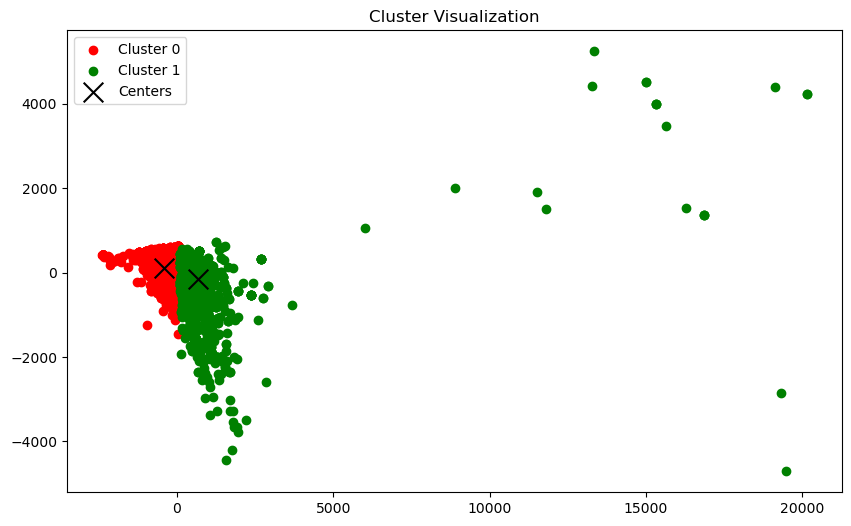

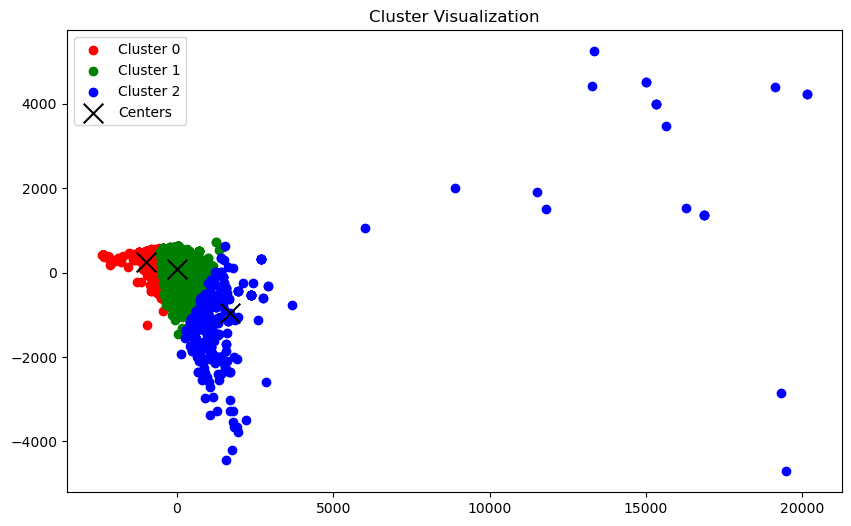

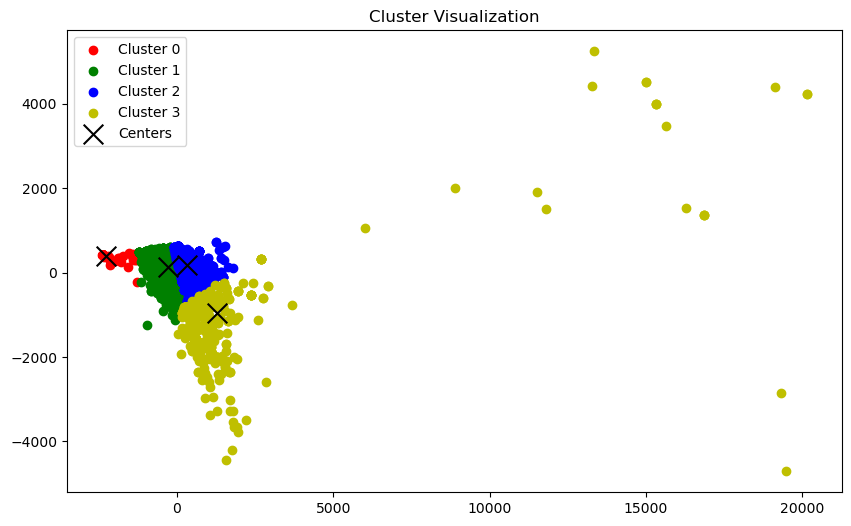

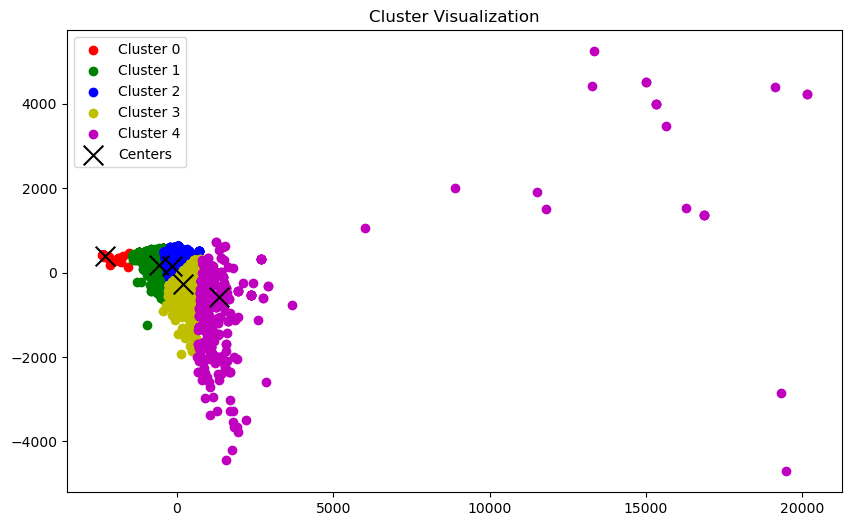

Cluster Labels for k=2: [0 0 0 ... 0 0 0]
Reduced Data for k=2: [[ -30.38913764  -52.36441873]
 [ -30.38828447  -52.36564468]
 [-649.90419964  362.36491681]
 ...
 [-379.50647246 -101.38881757]
 [-301.88372066  177.09787108]
 [-396.40292963  380.56874355]]
Cluster Labels for k=3: [1 1 0 ... 1 1 1]
Reduced Data for k=3: [[ -30.38913764  -52.36441873]
 [ -30.38828447  -52.36564468]
 [-649.90419964  362.36491681]
 ...
 [-379.50647246 -101.38881757]
 [-301.88372066  177.09787108]
 [-396.40292963  380.56874355]]
Cluster Labels for k=4: [1 1 1 ... 1 1 1]
Reduced Data for k=4: [[ -30.38913764  -52.36441873]
 [ -30.38828447  -52.36564468]
 [-649.90419964  362.36491681]
 ...
 [-379.50647246 -101.38881757]
 [-301.88372066  177.09787108]
 [-396.40292963  380.56874355]]
Cluster Labels for k=5: [2 2 1 ... 1 2 2]
Reduced Data for k=5: [[ -30.38913764  -52.36441873]
 [ -30.38828447  -52.36564468]
 [-649.90419964  362.36491681]
 ...
 [-379.50647246 -101.38881757]
 [-301.88372066  177.09787108]
 [-396.4

In [30]:

# Define the range of k values
k_values = range(2, 6)

# Initialize an empty list to store the cluster labels
kmeans_labels_list = []

# Initialize an empty list to store the reduced data
reduced_data_list = []

# Iterate over each k value
for k in k_values:
    # Perform MiniBatchKMeans clustering
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0).fit(df_train)
    kmeans_cluster_centers = np.sort(kmeans.cluster_centers_, axis=0)
    kmeans_labels = pairwise_distances_argmin(df_train, kmeans_cluster_centers)
    
    # Append the cluster labels to the list
    kmeans_labels_list.append(kmeans_labels)
    
    # Reduce data to two dimensions for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(df_train)
    
    # Append the reduced data to the list
    reduced_data_list.append(reduced_data)
    
    # Scatter plot of the reduced data
    plt.figure(figsize=(10, 6))
    colors = ['r', 'g', 'b', 'y', 'm', 'k']  # Adjust colors based on the number of clusters

    for i, color in enumerate(colors[:k]):
        # Select data points belonging to the current cluster
        points = reduced_data[kmeans_labels == i]
        plt.scatter(points[:, 0], points[:, 1], c=color, label=f'Cluster {i}')

    # Optionally, plot cluster centers
    centers = pca.transform(kmeans_cluster_centers)  # Transform cluster centers to reduced space
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, c='black', label='Centers')

    plt.title("Cluster Visualization")
    plt.legend()
    plt.show()
    joblib.dump(kmeans, 'mini_kmeans_model_k=' + str(k) + '.pkl')

# Print the cluster labels and reduced data for each k value
for k, labels, data in zip(k_values, kmeans_labels_list, reduced_data_list):
    print(f"Cluster Labels for k={k}: {labels}")
    print(f"Reduced Data for k={k}: {data}")
